# PCA to Kernel PCA

Let's say we have a data matrix or design matrix $X= \begin{bmatrix}  \pmb{x_1^T}\\ \vdots \\ \pmb{x_N^T}\end{bmatrix}$ where each observation $\pmb{x}_i \in \mathbb{R}^d$ is column vector.

To compute the PCA we can either compute eigen vectors or values of $X^TX$ or compute the eigen vectors $U$ and values $\Lambda$ of $XX^T.$ In the class, we showed that $X^TU$ and $\Lambda$ are eigen vectors and values of $X^TX$. We also showed that normalized eigen vectors $V$ are given by $X^TU\Lambda^{-1/2}$. We know that working with $XX^T$ allows us to kernelize PCA as dot product is between observations $\pmb{x_i}$.

Given kernel function $k$, let $K = \begin{bmatrix}  k(\pmb{x_1}, \pmb{x_1})   & k(\pmb{x_1}, \pmb{x_2}) &\cdots & k(\pmb{x_1}, \pmb{x_N})
\\  \vdots \\
k(\pmb{x_N}, \pmb{x_1})   & k(\pmb{x_N}, \pmb{x_2}) &\cdots & k(\pmb{x_N}, \pmb{x_N}) \end{bmatrix}$  be the Gram matrix.

From mercer theorem, we know that use of kernel implies an underlying feature space and function $\phi$, where we implicitly map point $\pmb{x_i}$ using this function as $\phi(\pmb{x_i})$.


Let $\pmb{\Phi}= \begin{bmatrix}  \phi(\pmb{x_1}^T)\\
\vdots \\
\phi(\pmb{x_N})^T
\end{bmatrix}$ be the corresponding design matrix after mapping points via $\phi$. This design matrix in mapped feature space is for conceptual understanding. We never build this in practice. 

<br>
Then $\pmb{\Phi \Phi^T} =\begin{bmatrix}
\phi(\pmb{x_1})^T\phi(\pmb{x_1})   & \phi(\pmb{x_1})^T\phi(\pmb{x_2}) &\cdots & \phi(\pmb{x_1})^T\phi(\pmb{x_N})\\
\vdots \\
\phi(\pmb{x_N})^T\phi(\pmb{x_1})   & \phi(\pmb{x_N})^T\phi(\pmb{x_2}) &\cdots & \phi(\pmb{x_N})^T\phi(\pmb{x_N})
\end{bmatrix} = $ is same as our

gram matrix $K$ as $ \phi(\pmb{x_i})^T\phi(\pmb{x_j})$ = $k(\pmb{x_i},\pmb{x_j})$.

Hence by analogy $V_{kpca} = \bf{\Phi}^T U \Lambda^{-1/2}$ where $U$ and $\Lambda$ are eigen value and vector of $K$. We proved in the class $\pmb{\Lambda}^{-1/2}$ is required to normalize eigen vector to unit length.

<font color ="red">Note that we never build(in some situation can't build) $\bf{\Phi}$. </font>

Hence we have the kernel principle component along the column of $V_{kpca}.$ 

Clearly we don't care about actual principle components in the feature space. We only want to calculate the projections along different principle component directions.

Let's say $\pmb{x_t}$ is a test vector in input space. Then we  can take the dot product of $\phi(x_t)$ with columns of $V_{kpca}$ to compute the projection as

$\phi(\pmb{x_t})^T V_{kpca} = \phi{(\pmb{x_t})}^T\bf{\Phi}^T U \Lambda^{-1/2} = \begin{bmatrix} \phi(\pmb{x_t})^T\phi(\pmb{x_1})  &\cdots & \phi(\pmb{x_t})^T\phi(\pmb{x_N}) \end{bmatrix} U \Lambda^{-1/2} =\begin{bmatrix} k(\pmb{x_t, x_1}) & \cdots & k(\pmb{x_t, x_N}) \end{bmatrix} U \Lambda^{-1/2} $

Hence if we have $N^*$ test point then we can store their interaction(dot product) with  each $\{ \pmb{x_i}\}_i^{N}$ in matrix $K^*_{N^* \times N}$.
 Projection into $L$ principle components can be calculated as 

 $K^* [U \Lambda^{-1/2}](:,:L) $ (selecting only $L$ column from $U \Lambda^{-1/2})$
 
 <font color ="megneta"> Can you convince yourself that if we want to calculate projection of all the input points $\{\bf{x_1}, \cdots, \bf{x_N} \}$ then $K^*=K$ hence projection is given by $U\Lambda^{1/2} ?$  </font> 
 
 
 
Everything is ok in above analysis but rememebr we forget to center the features in the feature space hence we work with $\bar{K} = HKH$ matrix where $H= I -\frac{1}{N}1_N1_N^T$ is the centering matrix. $I$ is $N\times N$ identity matrix and $1_N$ is vector of 1 of length $N$.

## Here is the final kernel PCA algorithm. 



- Input: Gram matrix $K_{N\times N}$, $K^*$ of size $N^* \times K$ and projection dim $L$.
- Build $H= I -\frac{1}{N}1_N1_N^T$ and compute centralized $\bar{K} = HKH= K- OK- KO +OKO$ where $O=\frac{1}{N}1_N1_N^T $
- $[U, \Lambda]$ = eig($\bar{K}$)
- Build $K*=\frac{1}{N^*}1_N1_N^T$ and compute centralized $\bar{K^*}  = K^*- O^*K^*- K^*O^* +O^*K^*O^*$

- Compute projection $ \bar{K^*}[U \Lambda^{-1/2}](:,:L) $



Let' Try Kernel PCA on following dataset. It should convince you about non linear PCA.

This is a circle dataset in sklearn. Read in sklearn about this dataset.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


Shape of X is (1000, 2)


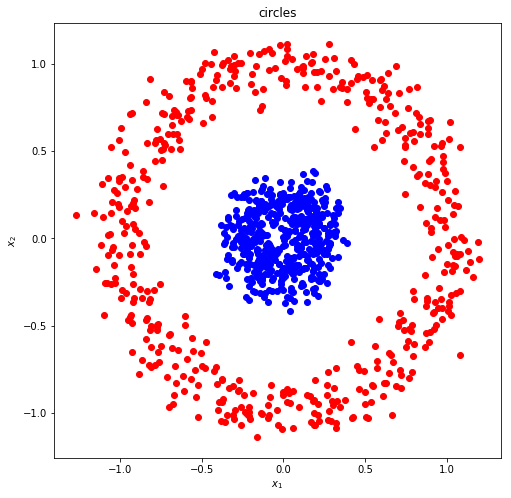

In [13]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.figure(figsize=(8,8))
print('Shape of X is {}'.format(X.shape))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red' )
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.title('circles')
plt.ylabel('$x_2$')
plt.xlabel('$x_1$')
plt.show()

Let' use RBF kernel to do kernel PCA

RBF kernel $k$ is defined as

$k(\pmb{x}_1, \pmb{x}_2) = exp(-\gamma \|\pmb{x}_i - \pmb{x}_j \|_2^2)$



# Q1 (1 point) Build function to calculate RBF kernel

In [ ]:
def rbf_kernel(x_i, x_i, gamma = 5.0):
    # Finish code the write RBF kernel
    
    

# Q2(1 point) Build function to calculate Gram matrix for any given kernel function

In [8]:
def gram_matrix(X, kernel_fn = rbf_kernel):
    '''
    input X: Input point in X along rows
    kernel_fn: kernel function to apply, default rbf
    '''
     # Finish code to return the gram matrix corresponding to kernel kernel_fn    
            

Let's compute centralizing matrix $H$

# Q3 (.5) Build matrix H. Look at the start for the definition.

In [19]:
# Write code here



# Q4 (.5 point) Compute gram matrix and centralized gram matrix

In [3]:
# Wrire code here

# Q 5 (1  Point) Compute the projection of X into first two principle component direction in the feature space.

Note: that you have to compute eigen value and vector decomposition of centralized matrix and arrange from largest to smallest  eigen value and corresponding eigen vector.
 

In [4]:
# Write code here

# Q6(.5 point) Plot the first two principle components. Use y values to color code the points. see plotting of points at the start. 

In [6]:
# write code here




# Q7(.5 point) Plot the first principle component. Use y values to  color code the points. see plotting of points at the start. 

In [7]:
# write code here

Let's compare with Linear PCA

# Q 8 (.5) Use PCA from sklearn to compute projection into first two principle component and plot them similar to question 6

In [ ]:
# write code here

# Q 9 (.5) plot only first principle component(as computed in Q 7) them similar to question 7

In [17]:
# write code here

## Here is a sample output from kernel PCA from sklearn

In [15]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma= 5.0)
projection = kpca.fit_transform(X)
projection.shape

(1000, 2)

Shape of X is (1000, 2)


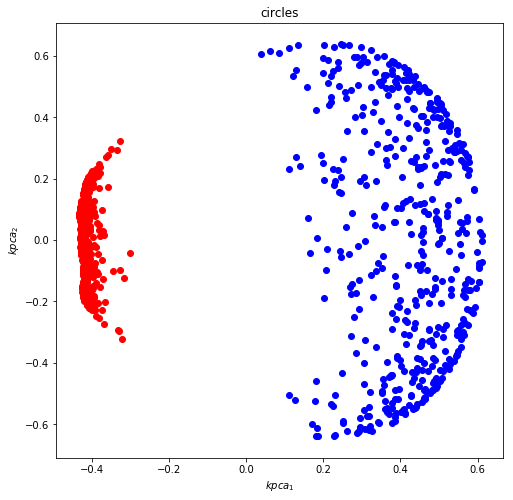

In [16]:
plt.figure(figsize=(8,8))
print('Shape of X is {}'.format(X.shape))

plt.scatter(projection[y==0, 0], projection[y==0, 1], color='red' )
plt.scatter(projection[y==1, 0], projection[y==1, 1], color='blue')
plt.title('circles')
plt.ylabel('$kpca_2$')
plt.xlabel('$kpca_1$')
plt.show()